In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)

In [6]:
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
df["label"] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

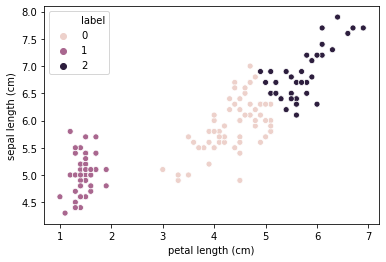

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.scatterplot(x=df["petal length (cm)"],
               y=df["sepal length (cm)"],
               hue=df["label"])

In [18]:
from sklearn.metrics import silhouette_score
x=[]
y=[]
for k in range(2, 10):
    cluster = KMeans(n_clusters=k)
    cluster.fit(iris["data"])
    s = silhouette_score(iris["data"], cluster.labels_)
    x.append(k)
    y.append(s)
print("k choise: ", x)
print("score: ", y)

k choise:  [2, 3, 4, 5, 6, 7, 8, 9]
score:  [0.681046169211746, 0.5528190123564091, 0.49745518901737446, 0.4887488870931048, 0.3648340039670018, 0.3588294450965675, 0.3520039484603334, 0.34347360106500074]


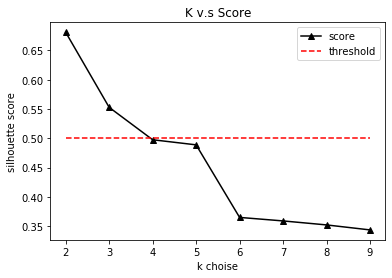

In [31]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
threshold = [0.5] * len(x)
plt.title("K v.s Score")
plt.xlabel("k choise")
plt.ylabel("silhouette score")
p1, = plt.plot(x, y, "^-k", label="score")
p2, = plt.plot(x, threshold, "--r", label="threshold")

plt.legend(handles=[p1, p2])